In [180]:
# Evelina Ramoskaite
# Textblob
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import csv
import seaborn as sns

import nltk
from nltk.corpus import stopwords

from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [181]:

current_path = os.getcwd()
print(current_path)

C:\Users\Edvinas\PycharmProjects\CapstoneProject\venv


In [182]:
# Loading the Data

data = pd.read_csv('hastagBTC-USD.csv')
data.columns

Index(['timestamp', 'tweet_text', 'all_hashtags', 'retweet_count',
       'tweet_created_at', ' username', 'followers_count'],
      dtype='object')

In [183]:
# Decoding the text columns
import ast
data.tweet_text = data['tweet_text'].apply(ast.literal_eval).str.decode("utf-8")
data.username = data[' username'].apply(ast.literal_eval).str.decode("utf-8")

In [184]:
# Tweets
data.tweet_text.head(10)

0    This is finally rising to the surface!!  On wh...
1    #Investing 43.8% in this optimal #crypto portf...
2    Crypto Currency Whale Makes M Bitcoin Wager on...
3    @RealisticCrypt1 Bitcoin hits $63k. Take this ...
4    @spectatorindex Can some expert of crypto curr...
5    @bitfalls why would you call bitcoin an altcoi...
6    @brant_vogt @RyanLEllis @JoeBiden I really hop...
7    @Prodigy_PUBG @RemindMe_OfThis Hi plz help me ...
8    Former U.S. Regulator Joins Square To Lead Bit...
9    @5harath @APompliano @coinbase Congratulations...
Name: tweet_text, dtype: object

In [185]:
data.head(15)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count
0,2021-04-28 23:59:58,This is finally rising to the surface!! On wh...,[],2,2021-04-28 23:59:58,b'AwyeeDeaterBob',3638
1,2021-04-28 23:59:57,#Investing 43.8% in this optimal #crypto portf...,"['Investing', 'crypto', 'cash', 'Bitcoin', 'ri...",0,2021-04-28 23:59:57,b'CryptoWatchBot',2037
2,2021-04-28 23:59:55,Crypto Currency Whale Makes M Bitcoin Wager on...,[],0,2021-04-28 23:59:55,b'FintechSE',205
3,2021-04-28 23:59:55,@RealisticCrypt1 Bitcoin hits $63k. Take this ...,"['Binance', 'bitcoin', 'Bitcoin', 'Btc', 'inve...",0,2021-04-28 23:59:55,b'buren_tom',34
4,2021-04-28 23:59:55,@spectatorindex Can some expert of crypto curr...,[],1,2021-04-28 23:59:55,b'AbabeelTheBird',181
5,2021-04-28 23:59:53,@bitfalls why would you call bitcoin an altcoi...,[],0,2021-04-28 23:59:53,b'EncrypticTV',4017
6,2021-04-28 23:59:50,@brant_vogt @RyanLEllis @JoeBiden I really hop...,[],0,2021-04-28 23:59:50,b'JodiLynnWalker',1045
7,2021-04-28 23:59:47,@Prodigy_PUBG @RemindMe_OfThis Hi plz help me ...,[],0,2021-04-28 23:59:47,b'AmoozegarFirooz',0
8,2021-04-28 23:59:45,Former U.S. Regulator Joins Square To Lead Bit...,[],0,2021-04-28 23:59:45,b'zapecoin',79
9,2021-04-28 23:59:44,@5harath @APompliano @coinbase Congratulations...,[],0,2021-04-28 23:59:44,b'FittrPM',72


In [186]:
# Preprocessing stage
import re  
  

In [192]:
#preprocess tweets

data.tweet_text =data.tweet_text.str.lower()  #tranform tweet col to lower case

#Remove handlers

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove hashtags

data.tweet_text  = data.tweet_text.apply(lambda x:re.sub("#", "", x))


#remove all single characters

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space

data.tweet_text   = data.tweet_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))


cleaned=data.tweet_text


In [193]:
data.head(15)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count
0,2021-04-28 23:59:58,this is finally rising to the surface!! on why...,[],2,2021-04-28 23:59:58,b'AwyeeDeaterBob',3638
1,2021-04-28 23:59:57,investing 43.8% in this optimal crypto portfol...,"['Investing', 'crypto', 'cash', 'Bitcoin', 'ri...",0,2021-04-28 23:59:57,b'CryptoWatchBot',2037
2,2021-04-28 23:59:55,crypto currency whale makesbitcoin wager on ke...,[],0,2021-04-28 23:59:55,b'FintechSE',205
3,2021-04-28 23:59:55,bitcoin hits $63k. take this chance to mine a...,"['Binance', 'bitcoin', 'Bitcoin', 'Btc', 'inve...",0,2021-04-28 23:59:55,b'buren_tom',34
4,2021-04-28 23:59:55,can some expert of crypto currency tell me wh...,[],1,2021-04-28 23:59:55,b'AbabeelTheBird',181
5,2021-04-28 23:59:53,why would you call bitcoin an altcoin when th...,[],0,2021-04-28 23:59:53,b'EncrypticTV',4017
6,2021-04-28 23:59:50,really hope you are right about bitcoin.,[],0,2021-04-28 23:59:50,b'JodiLynnWalker',1045
7,2021-04-28 23:59:47,hi plz help me plz i'm nurse . we fight for c...,[],0,2021-04-28 23:59:47,b'AmoozegarFirooz',0
8,2021-04-28 23:59:45,former u.s. regulator joins square to lead bit...,[],0,2021-04-28 23:59:45,b'zapecoin',79
9,2021-04-28 23:59:44,congratulations 🎊. did you refer any learning...,[],0,2021-04-28 23:59:44,b'FittrPM',72


In [136]:
data.to_csv('DEMO.csv') 

In [190]:
data.tweet_text

0        this is finally rising to the surface!! on why...
1        #investing 43.8% in this optimal #crypto portf...
2        crypto currency whale makesbitcoin wager on ke...
3         bitcoin hits $63k. take this chance to mine a...
4         can some expert of crypto currency tell me wh...
                               ...                        
47116    it’s happening ... #bitcoin #btc $btc #ethereu...
47117    #pitbull listed on cointiger today!! do you fe...
47118         inflation or not, i'm stacking sats #bitcoin
47119     amazing opportunity #giveaway #bitcoin #ether...
47120    we needgathering, but not"conference". we need...
Name: tweet_text, Length: 47121, dtype: object

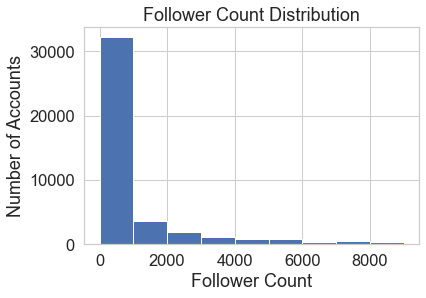

In [191]:
# follower counts
plt.hist(data['followers_count'],bins=range(0,10000,1000))
plt.xlabel('Follower Count')
plt.ylabel('Number of Accounts')
plt.title('Follower Count Distribution')
plt.show()

# Sentiment Analysis

In [140]:
from textblob import TextBlob
from wordcloud import WordCloud,STOPWORDS

### Fetching sentiment with textblob

In [221]:
# sentiment prediction
def textblob_sentiment(text):
    sentiment = []
    for i in text: 
        analysis = TextBlob(i)
        # set sentiment 
        if analysis.sentiment.polarity > 0:
            sentiment.append('positive')
        elif analysis.sentiment.polarity < 0:
            sentiment.append('negative')
        else: 
            sentiment.append('neutral')
    return sentiment

In [239]:
# adding textblob sentiment to dataframe
data['textblob'] = textblob_sentiment(cleaned)

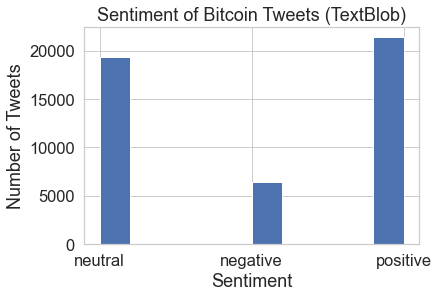

In [241]:
#plotting sentiment score results
plt.hist(data.textblob)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (TextBlob)')
plt.show()

###  Vader

In [242]:
# importing nltk and the vader lexicon
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Edvinas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [243]:
def vader_sentiment(text):
    sentiment = []
    for i in text: 
        sid = SentimentIntensityAnalyzer()
        # set sentiment 
        ss = sid.polarity_scores(i)
        if ss["compound"] > 0:
            sentiment.append('positive')
        elif ss["compound"] < 0:
            sentiment.append('negative')
        else: 
            sentiment.append('neutral')
    return sentiment

In [244]:
# adding vader sentiment to dataframe
data.vader = vader_sentiment(cleaned)

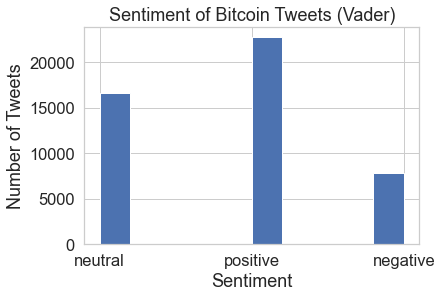

In [245]:
# Plotting vader sentiment score distribution
plt.hist(data.vader)
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment of Bitcoin Tweets (Vader)')
plt.show()

    ### Wordcloud

In [156]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title,stopWords):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, 
                   max_words = 100,
                   max_font_size = 50,
                  stopwords=stopWords)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

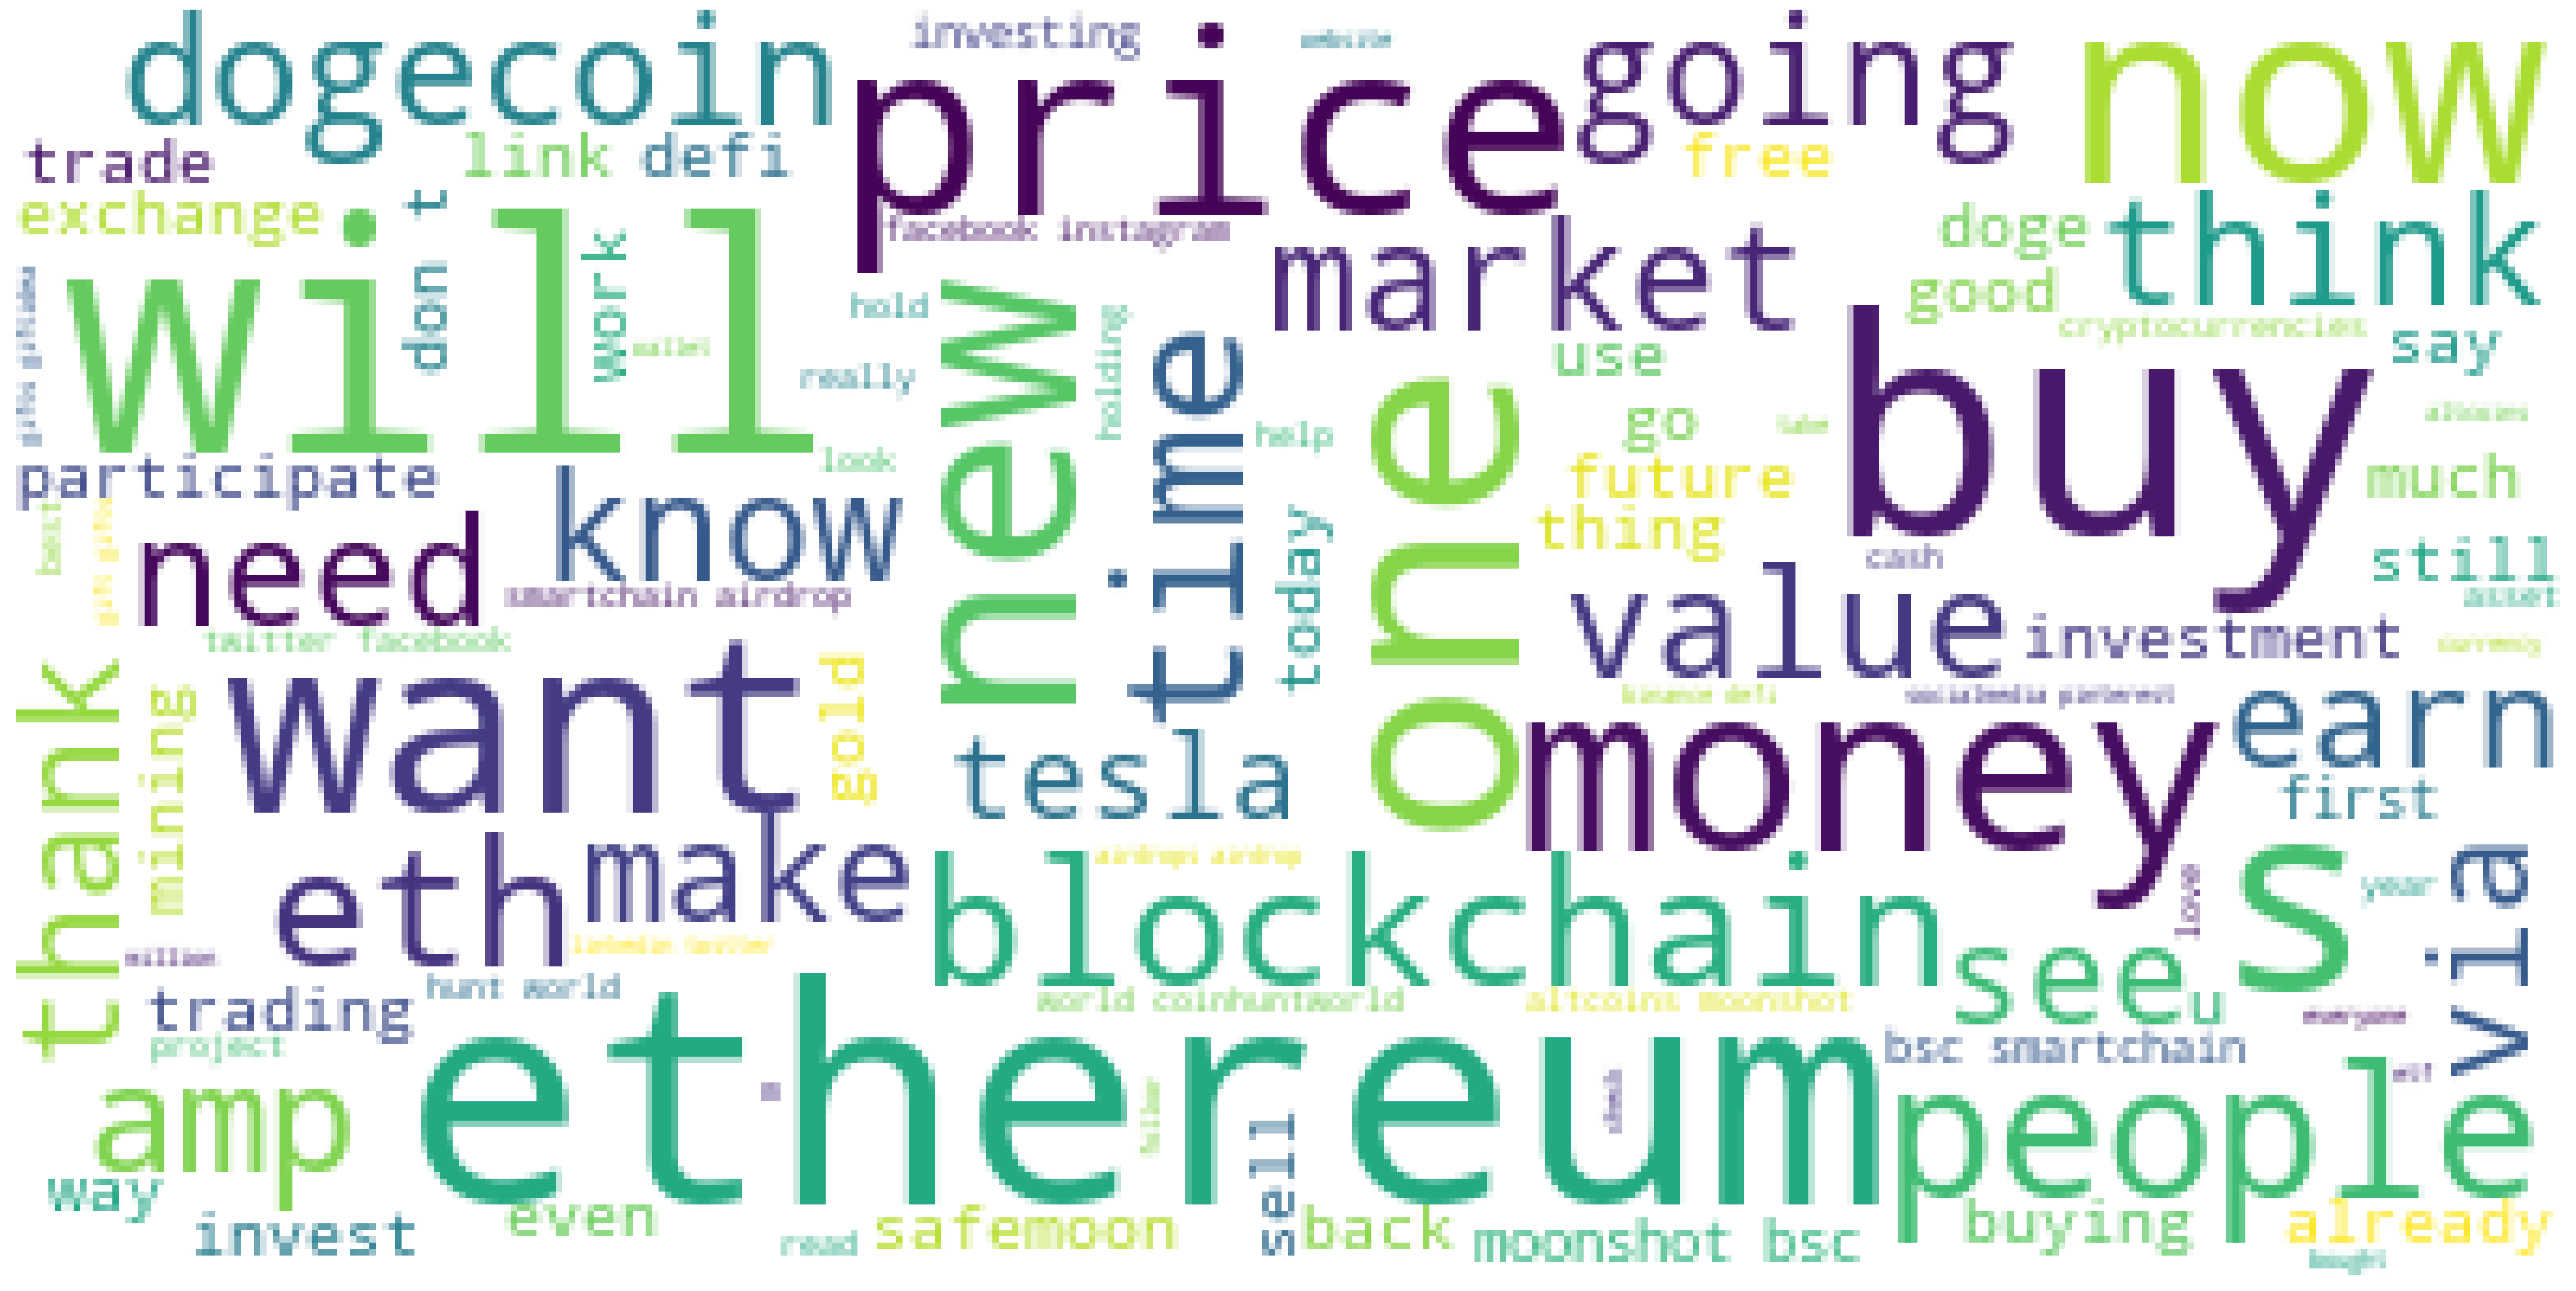

In [160]:
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['bitcoin','stock','crypto','btc','coin','cryptocurrency','altcoin']

# Word Cloud for all of the tweets
wc(cleaned,'white','Common Words',customStopwords )

In [ ]:
# Word Cloud for Positive tweets

In [254]:
positive = data.loc[data['textblob']=='positive']    # fetching positive tweets

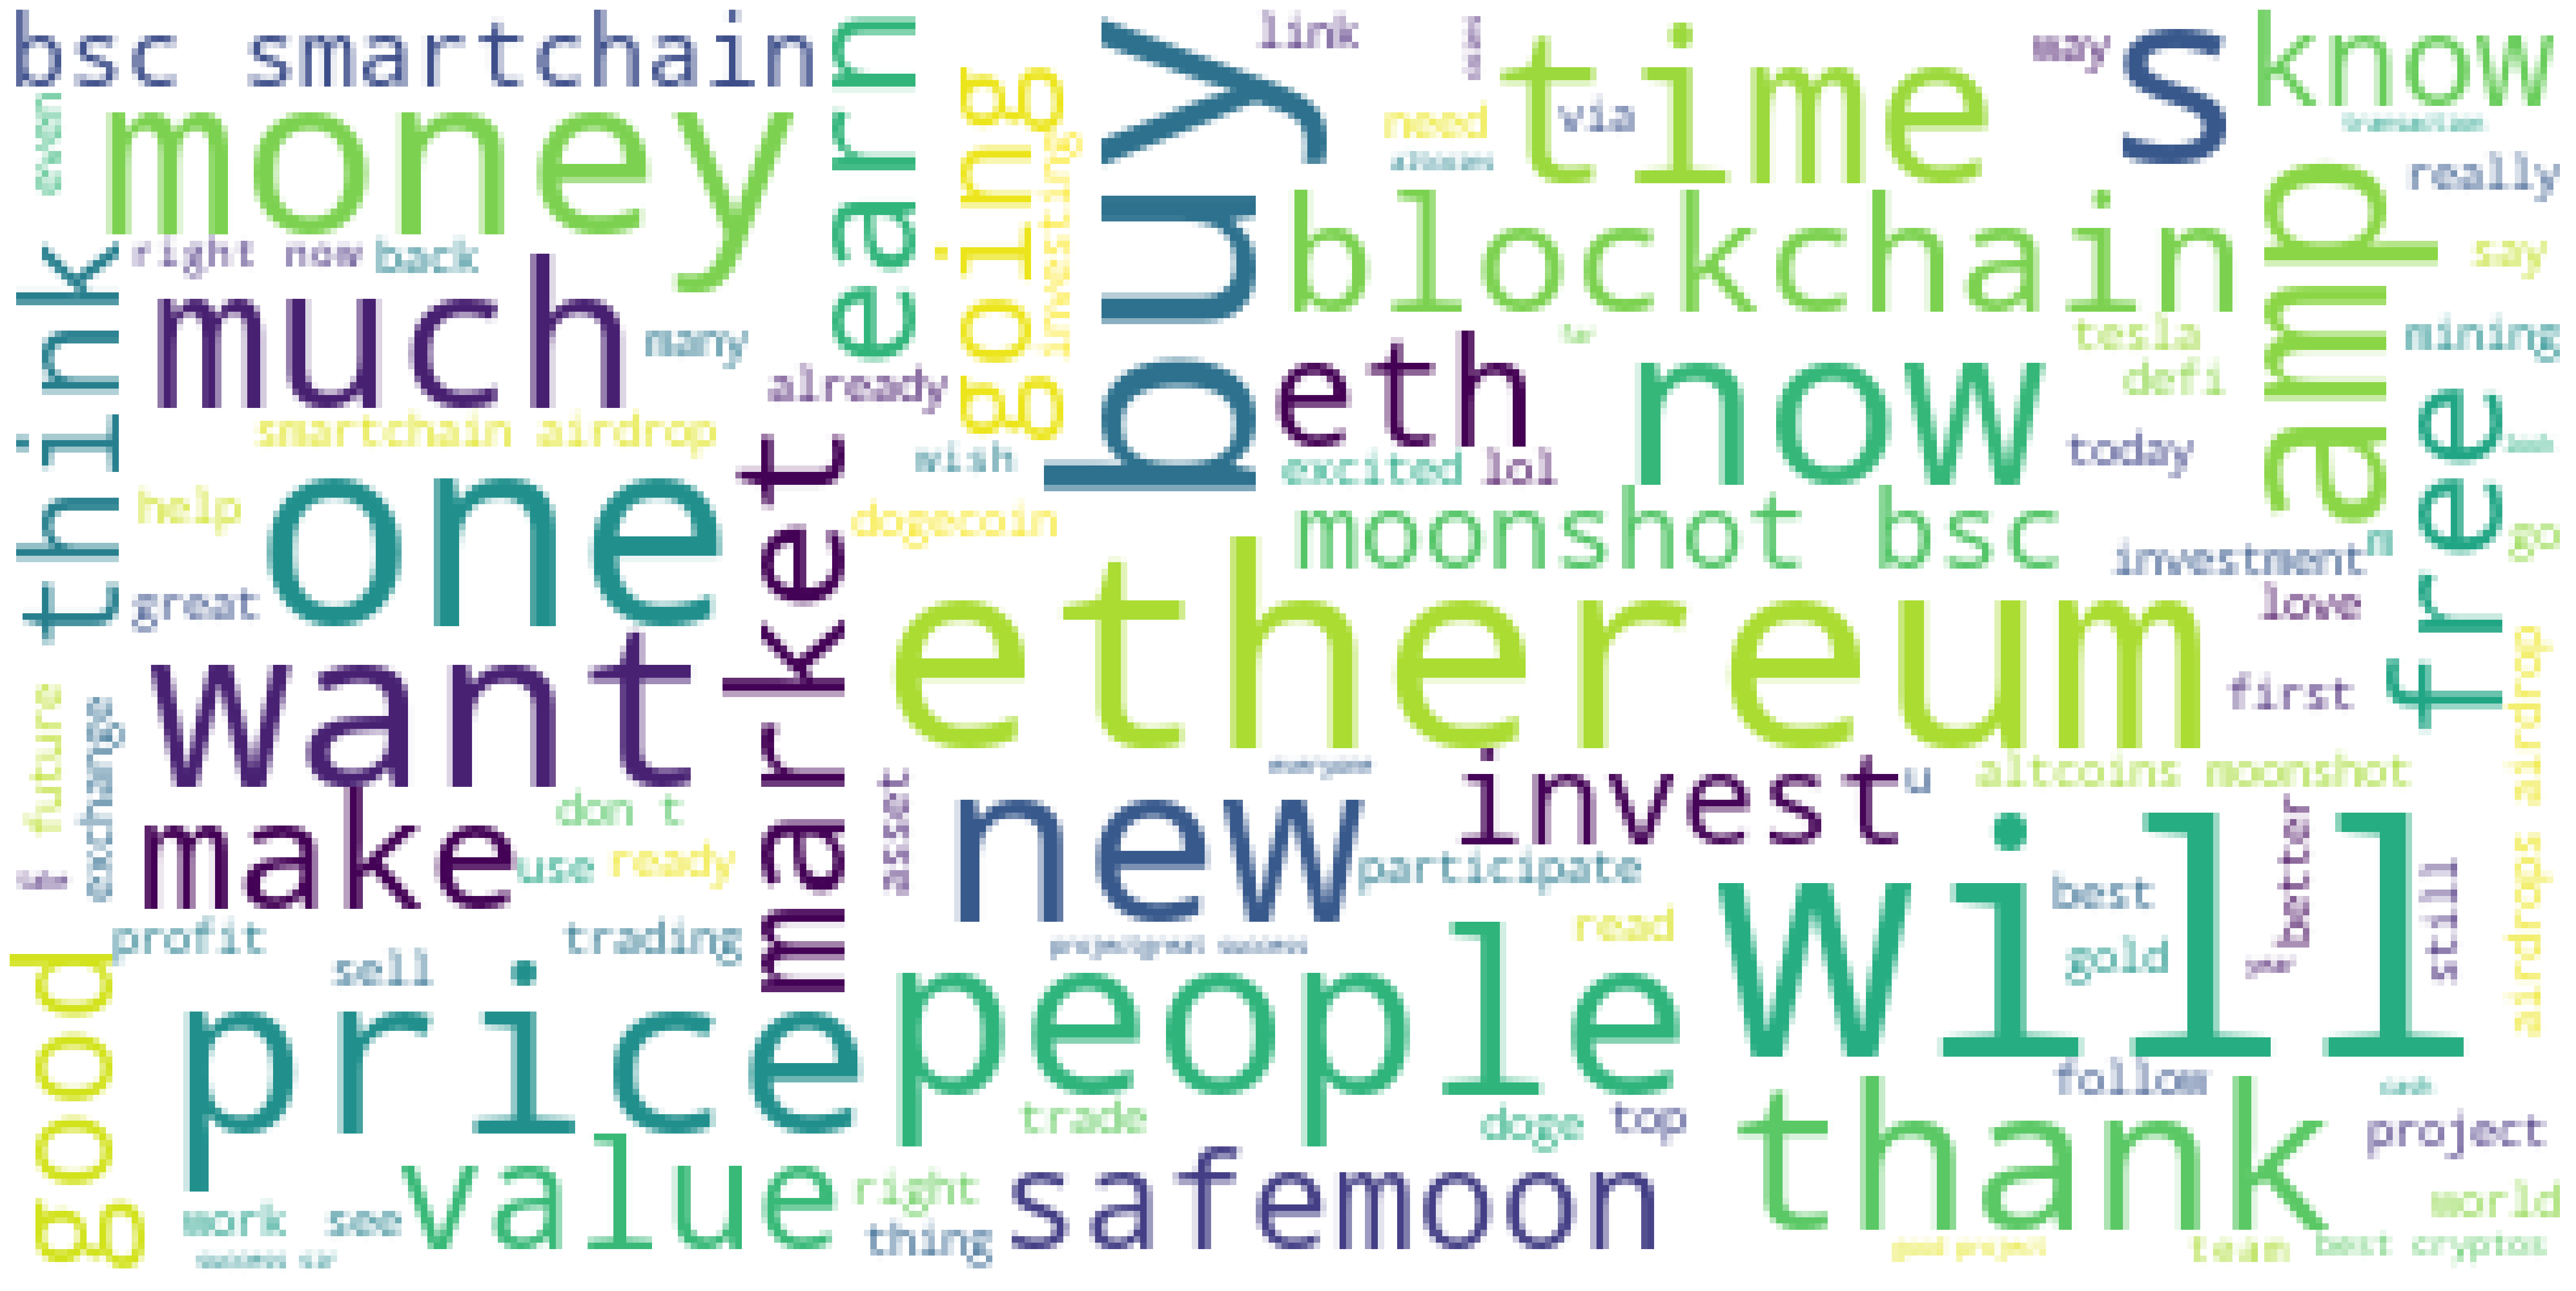

In [255]:
wc(positive.tweet_text,'white','Common Words',customStopwords )

In [256]:
# Word Cloud for Neutral Tweets

In [257]:
neutral = data.loc[data['textblob']=='neutral']   # fetching neutral tweets

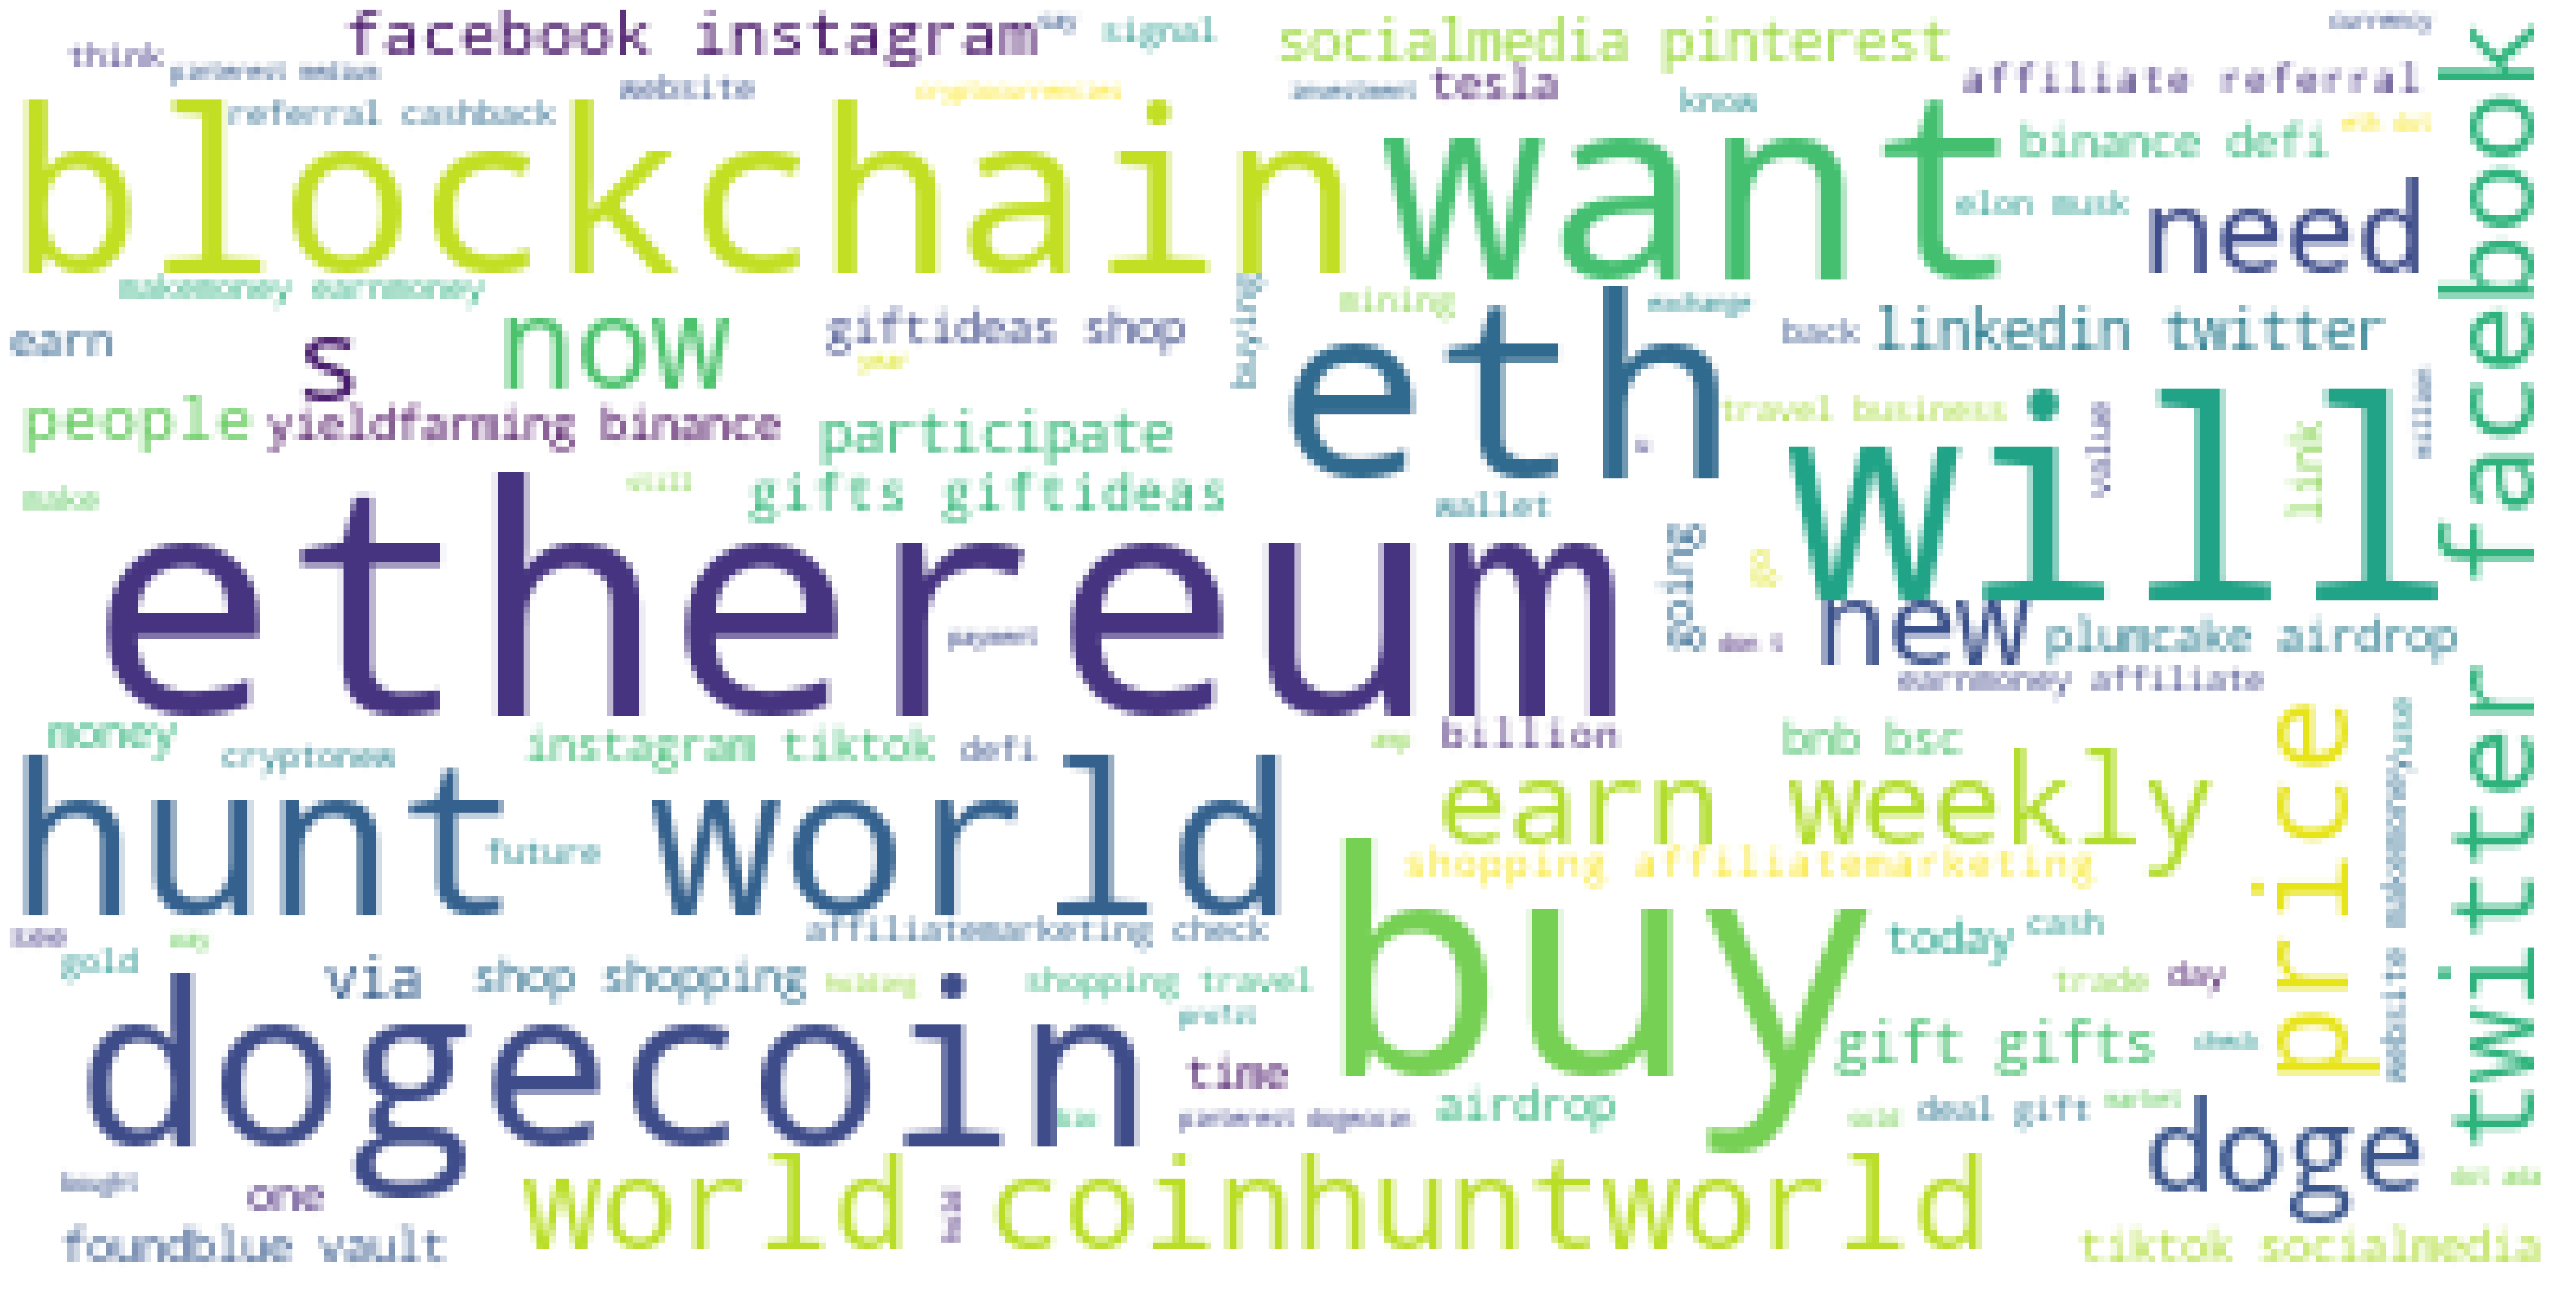

In [258]:
wc(neutral.tweet_text,'white','Common Words',customStopwords )

In [259]:
# Word Cloud for Negative Tweets

In [260]:
negative = data.loc[data['textblob']=='negative']  # fetching negative tweets

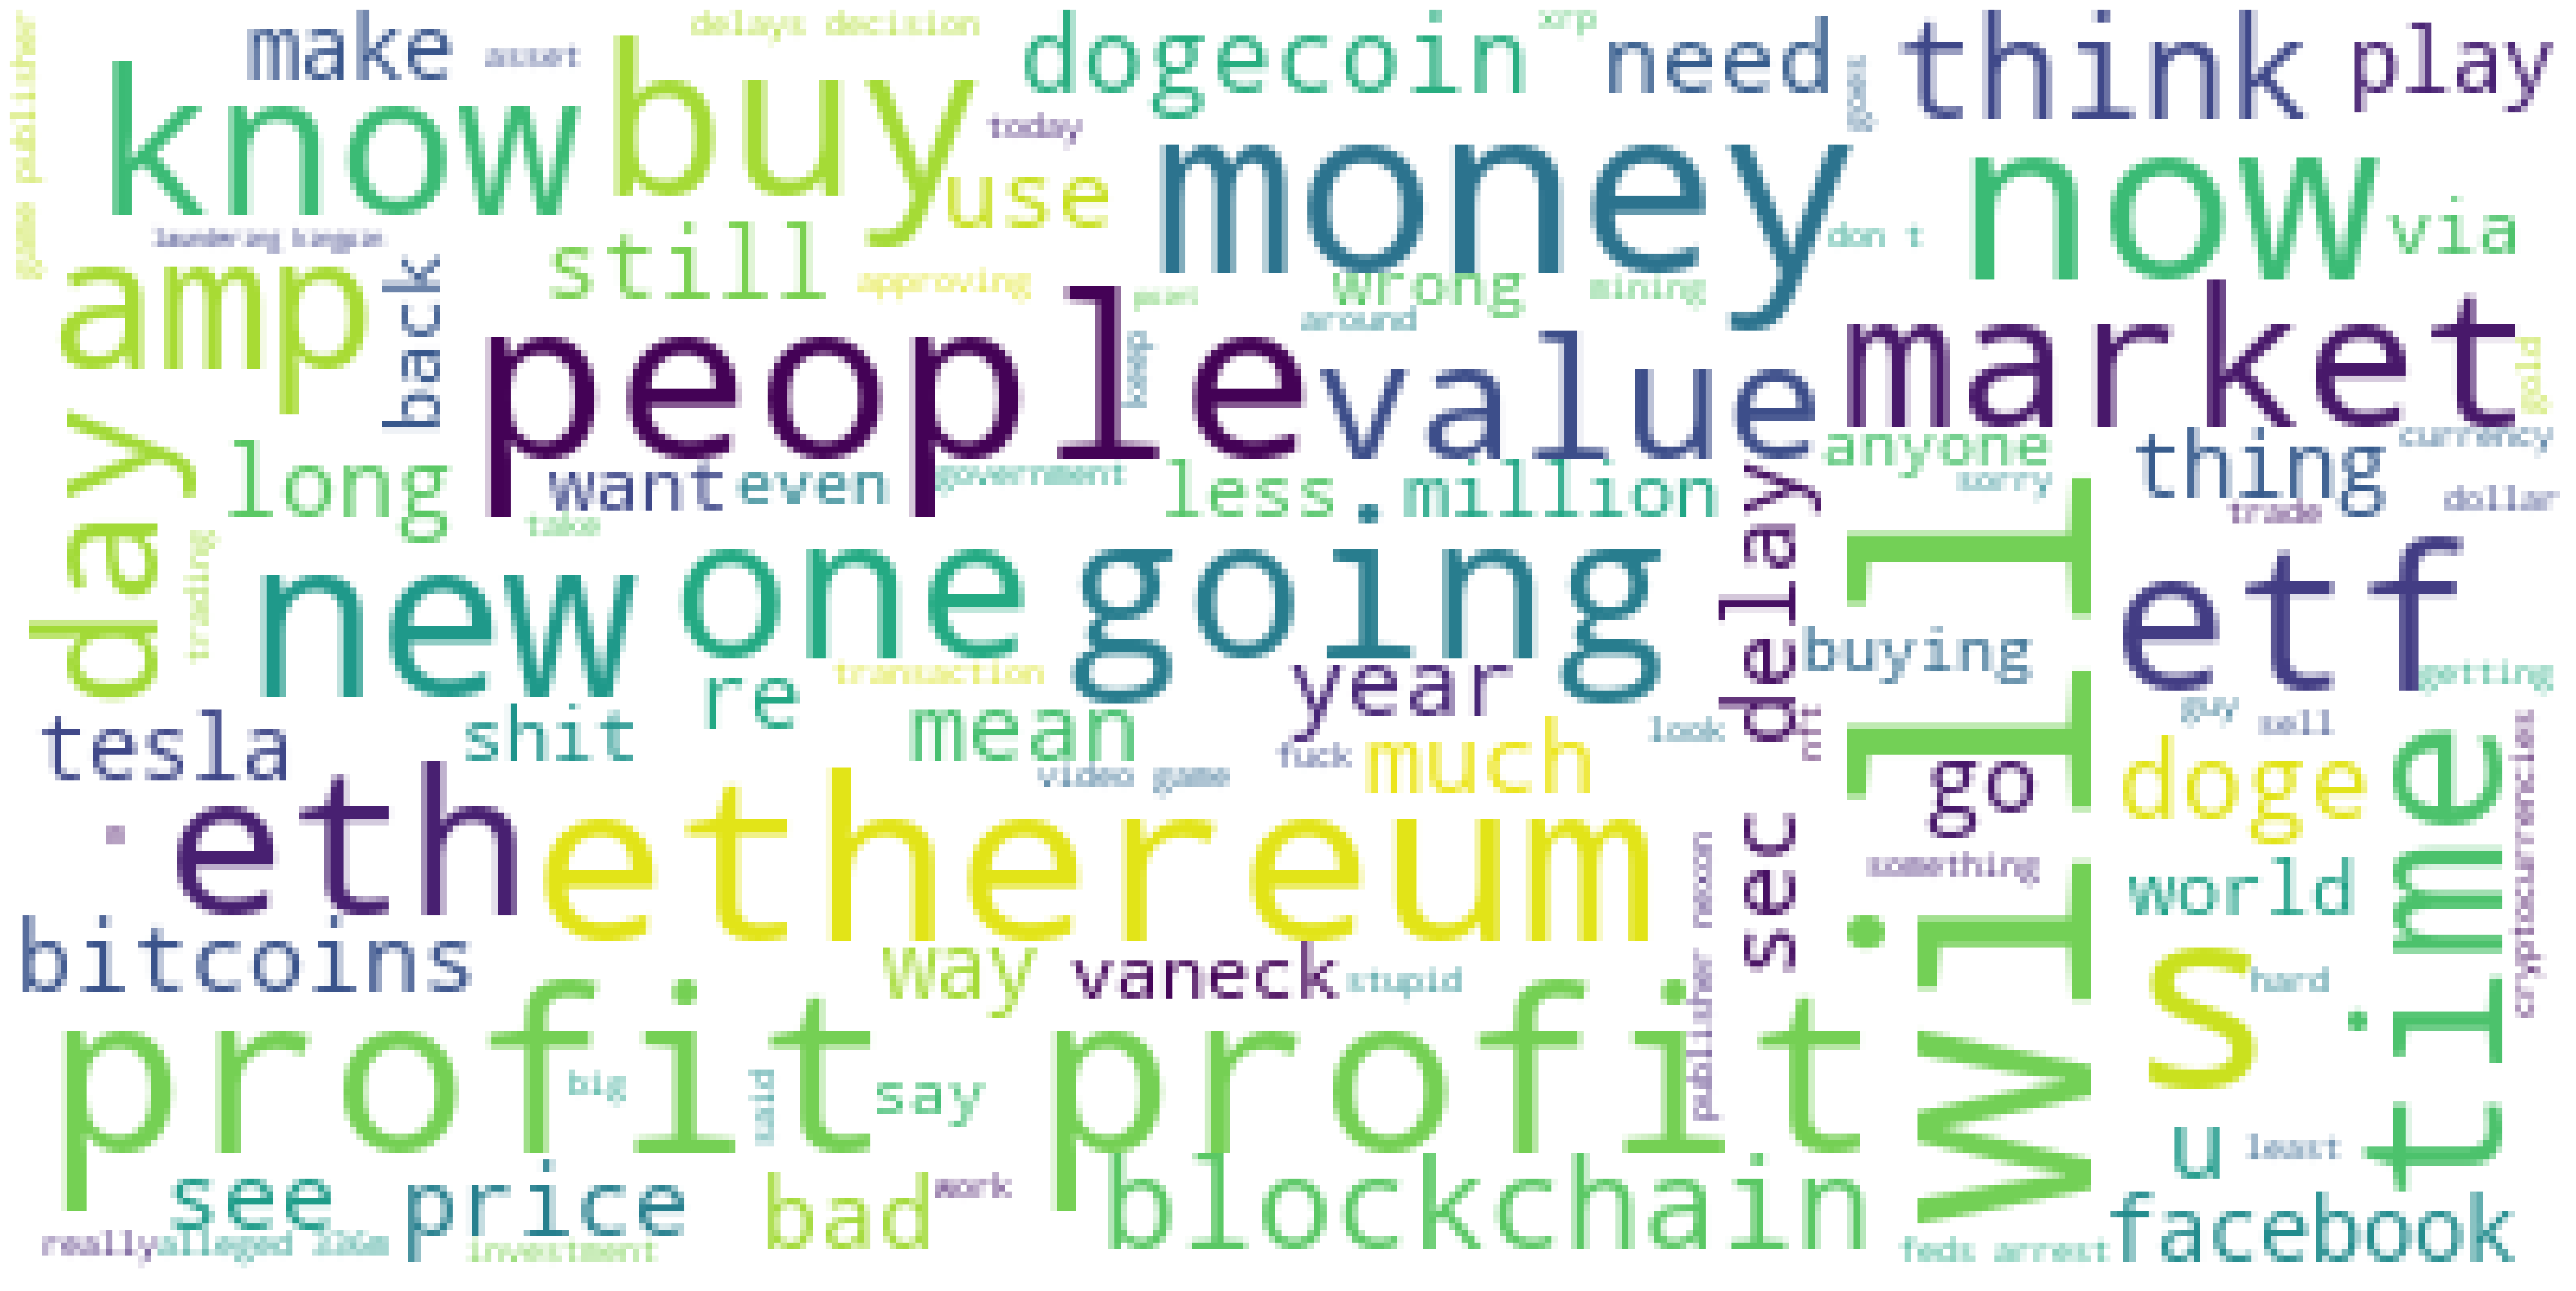

In [261]:
wc(negative.tweet_text,'white','Common Words',customStopwords )

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count,textblob
4,2021-04-28 23:59:55,can some expert of crypto currency tell me wh...,[],1,2021-04-28 23:59:55,b'AbabeelTheBird',181,positive
6,2021-04-28 23:59:50,really hope you are right about bitcoin.,[],0,2021-04-28 23:59:50,b'JodiLynnWalker',1045,positive
10,2021-04-28 23:59:43,please fund my new bitcoin lightningnetwork wa...,"['bitcoin', 'LightningNetwork', 'faucet']",0,2021-04-28 23:59:43,b'AwanxAwanx',106,positive
15,2021-04-28 23:59:37,drop your username and earn 0.000100 btc ! vis...,"['bitcoin', 'cryptocurrency', 'GamingNews', 'B...",0,2021-04-28 23:59:37,b'Satoshi_Hill',560,positive
19,2021-04-28 23:59:34,hasbro views nfts ashuge opportunity for ‘magi...,"['cryptocurrency', 'Bitcoin', 'Forex']",1,2021-04-28 23:59:34,b'eBargainsToday',7016,positive


In [100]:

data2= pd.read_csv('hastagSPYplain.csv')
data.head(10)

,timestamp,tweet_text,all_hashtags,retweet_count,tweet_created_at,username,followers_count
0,2021-04-28 23:59:58,b this is finally rising to the surface on why...,[],2,2021-04-28 23:59:58,b'AwyeeDeaterBob',3638
1,2021-04-28 23:59:57,b investing 43 8 in this optimal crypto portfo...,"['Investing', 'crypto', 'cash', 'Bitcoin', 'ri...",0,2021-04-28 23:59:57,b'CryptoWatchBot',2037
2,2021-04-28 23:59:55,b crypto currency whale makesbitcoin wager on ...,[],0,2021-04-28 23:59:55,b'FintechSE',205
3,2021-04-28 23:59:55,b bitcoin hits 63k take this chance to mine an...,"['Binance', 'bitcoin', 'Bitcoin', 'Btc', 'inve...",0,2021-04-28 23:59:55,b'buren_tom',34
4,2021-04-28 23:59:55,b can some expert of crypto currency tell me w...,[],1,2021-04-28 23:59:55,b'AbabeelTheBird',181
5,2021-04-28 23:59:53,b why would you call bitcoin an altcoin when t...,[],0,2021-04-28 23:59:53,b'EncrypticTV',4017
6,2021-04-28 23:59:50,breally hope you are right about bitcoin,[],0,2021-04-28 23:59:50,b'JodiLynnWalker',1045
7,2021-04-28 23:59:47,b hi plz help me plzm nurse we fight for coron...,[],0,2021-04-28 23:59:47,b'AmoozegarFirooz',0
8,2021-04-28 23:59:45,b formers regulator joins square to lead bitco...,[],0,2021-04-28 23:59:45,b'zapecoin',79
9,2021-04-28 23:59:44,b congratulations xf0 x9f x8e x8a did you refe...,[],0,2021-04-28 23:59:44,b'FittrPM',72
